In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
np.random.seed = 42

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_extraction.text import CountVectorizer

# Diabetes Prediction

### Problem statement

The objective of this dataset is to build a predictive model for diagnosing diabetes. The model should predict whether a patient has diabetes (Outcome = 2), prediabetes (Outcome = 1) or does not have diabetes (Outcome = 0).

### Data description

| Column Name           | Description                                      |
|:----------------------|:-------------------------------------------------|
| Diabetes_012          | 0 = no diabetes 1 = prediabetes 2 = diabetes     |
| HighBP                | 0 = no high BP 1 = high BP                       |
| HighChol              | 0 = no high cholesterol 1 = high cholesterol|
| CholCheck             | 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years|
| BMI                   | Body Mass Index|
| Smoker                | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes|
| Stroke                | (Ever told) you had a stroke. 0 = no 1 = yes
| HeartDiseaseorAttack  | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
| PhysActivity          | physical activity in past 30 days - not including job 0 = no 1 = yes
| Fruits                | Consume Fruit 1 or more times per day 0 = no 1 = yes
| Veggies               | Consume Vegetables 1 or more times per day 0 = no 1 = yes
| HvyAlcoholConsump     | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
| AnyHealthcare         | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
| NoDocbcCost           | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
| GenHlth               | Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
| MentHlth              | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
| PhysHlth              | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
| DiffWalk              | Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
| Sex                   | 0 = female 1 = male
| Age                   | 13-level age category (AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
| Education             | Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
| Income                | Income scale (INCOME2 see codebook) scale 1-8 1 = less than 10,000 5 = less than 35,000 8 = 75,000 or more



### EDA

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.shape

(253680, 22)

In [5]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Conclusion: The set does not contain missing values.

In [7]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


Conclusion: A large number of variables take binary values (0 or 1).

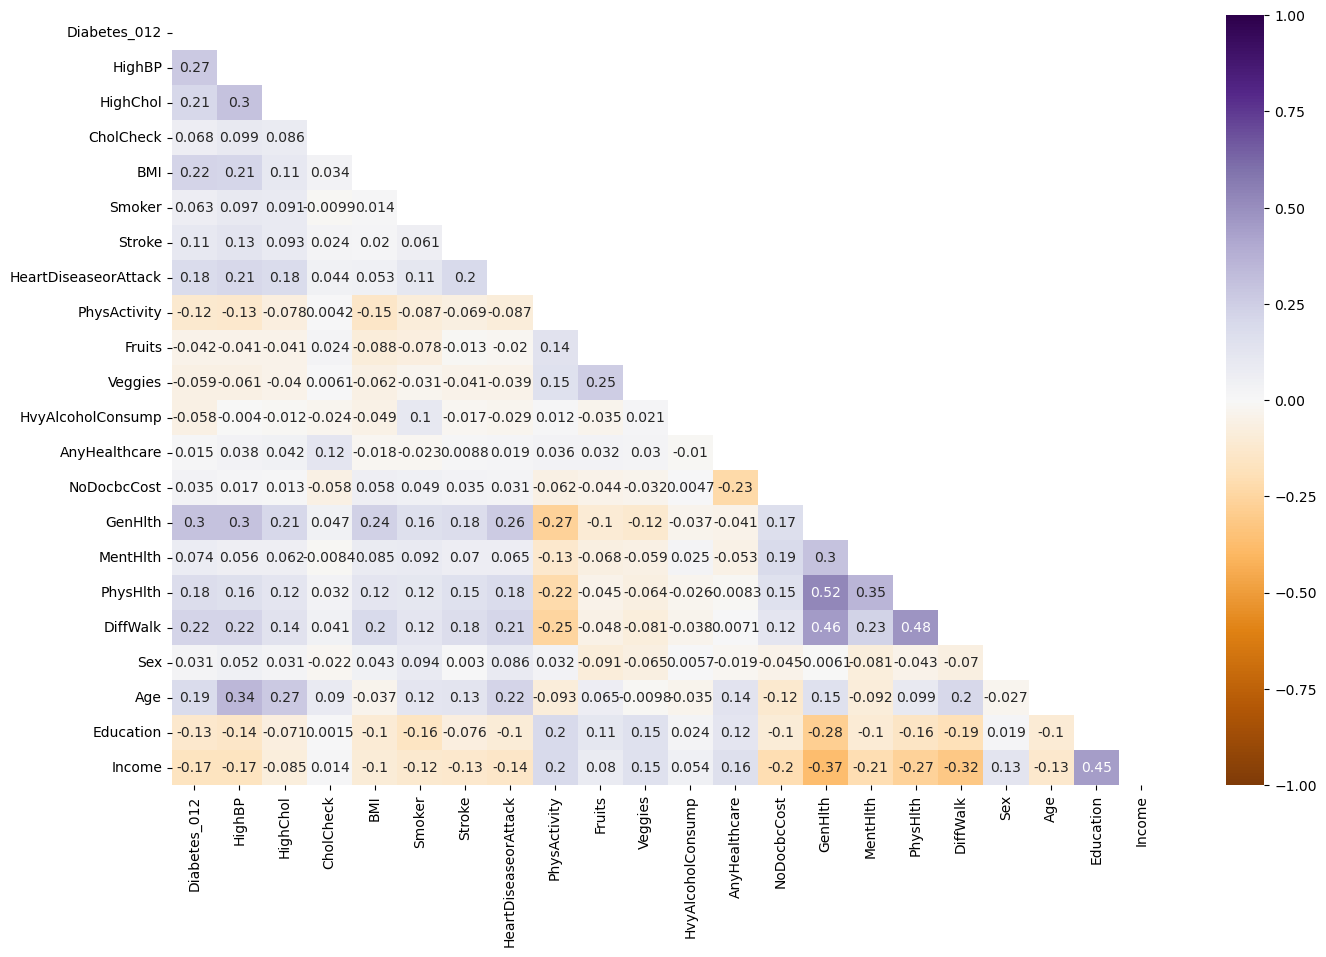

In [8]:
num_features = [name for name in df.columns if pd.api.types.is_numeric_dtype(df[name])]
plt.figure(figsize=(16, 10))
mask = np.triu(df[num_features].corr())
heatmap = sns.heatmap(df[num_features].corr(), annot=True, vmin=-1, vmax=1, cmap="PuOr", mask=mask)
plt.show()

Conclusions: 

The most strongly correlated variables in the dataset are:

  - ρ(PhysHlth, GenHlth) = 0.52
  - ρ(PhysHlth, DiffWalk) = 0.48
  - ρ(GenHlth, DiffWalk) = 0.46
  - ρ(Income, Education) = 0.45

* The variable most strongly correlated with the target variable is GenHlth, ρ(GenHlth, Diabetes_012) = 0.3

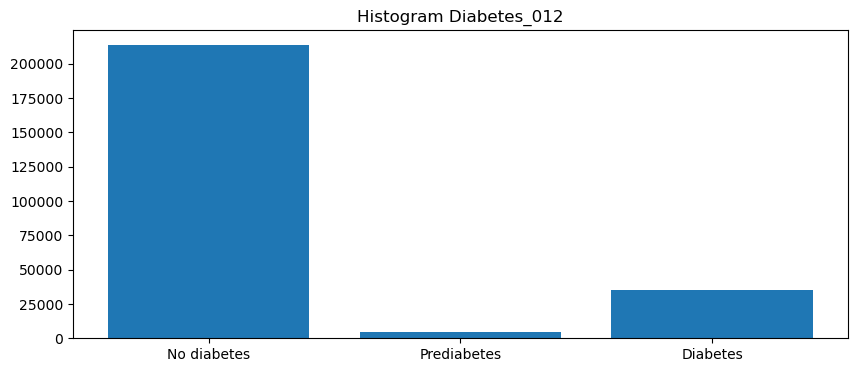

In [9]:
plt.figure(figsize=(10, 4))
plt.hist(df['Diabetes_012'], bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8)
plt.title('Histogram Diabetes_012')
plt.xticks([0, 1, 2], ['No diabetes', 'Prediabetes', 'Diabetes'])

plt.show()

Description: Distribution of the target variable

#### Split into binary and numerical columns

In [10]:
df_bool = df.drop(['BMI', "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"], axis=1).reset_index(drop = True)
df_bool.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [11]:
df_num = df.drop(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'], axis=1).reset_index(drop = True)
df_num.head()

,Diabetes_012,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,0.0,40.0,5.0,18.0,15.0,9.0,4.0,3.0
1,0.0,25.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,28.0,5.0,30.0,30.0,9.0,4.0,8.0
3,0.0,27.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,24.0,2.0,3.0,0.0,11.0,5.0,4.0


#### Analysis of Binary Columns

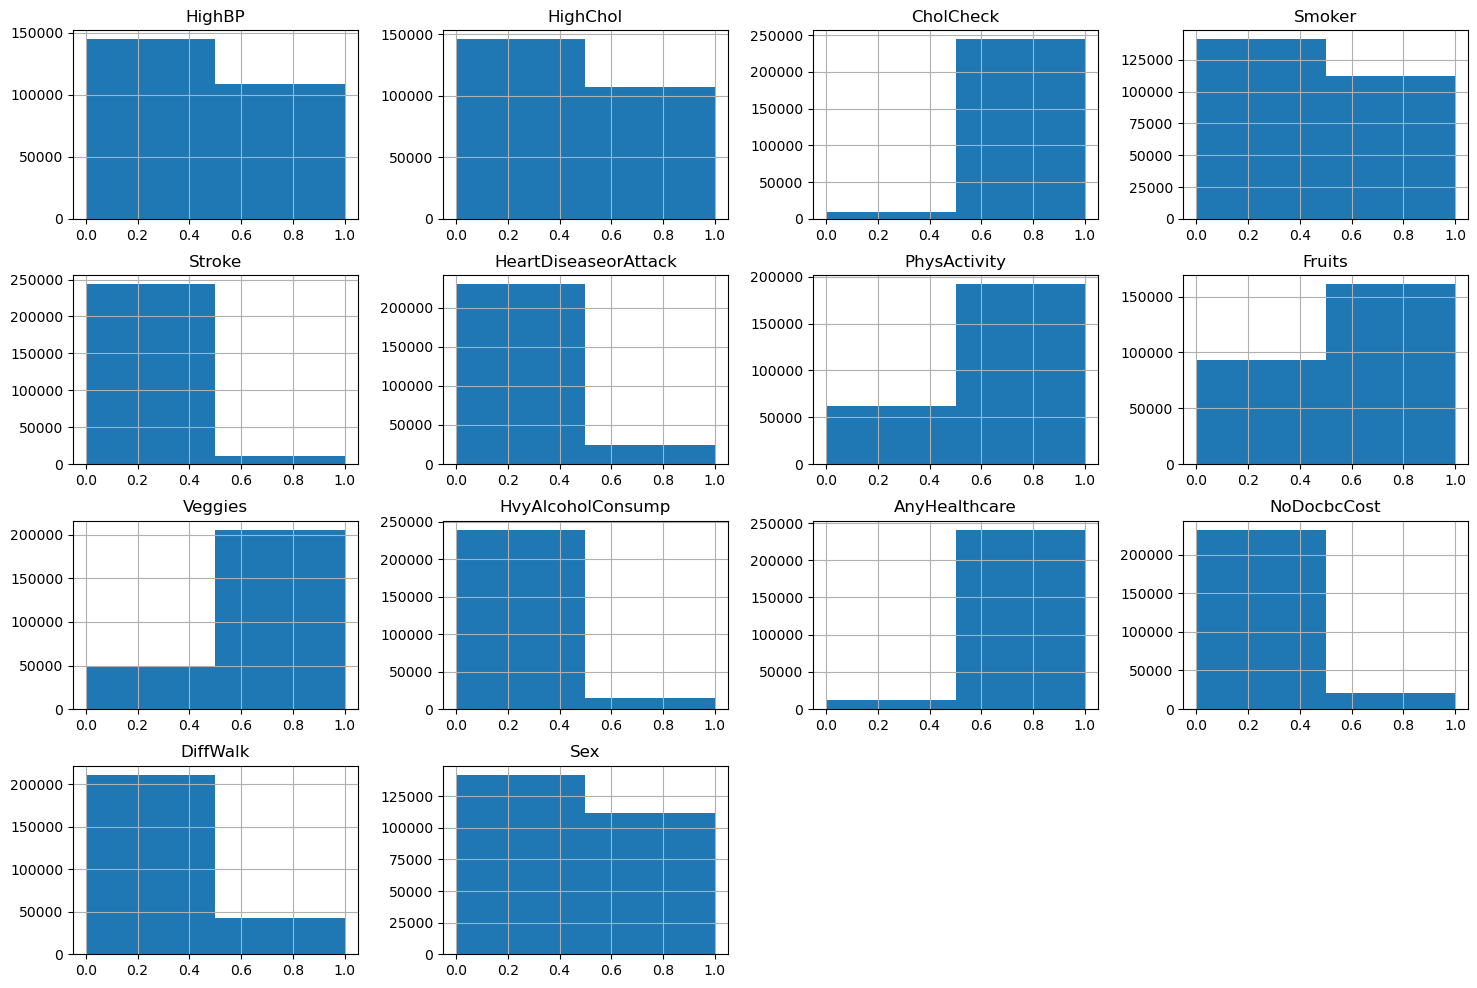

In [12]:
df_bool1 = df_bool.drop(['Diabetes_012'], axis=1).reset_index(drop = True)
df_bool1.hist(bins = 2, figsize=(18, 12))
plt.show()

In [13]:
bi_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
df_bool["ind"] = range(0,len(df_bool["HighBP"]))
b = df_bool.groupby(["Diabetes_012"], as_index = False)["ind"].count()
b["all_by_diab"]= b["ind"]
b = b.drop(["ind"],axis=1)

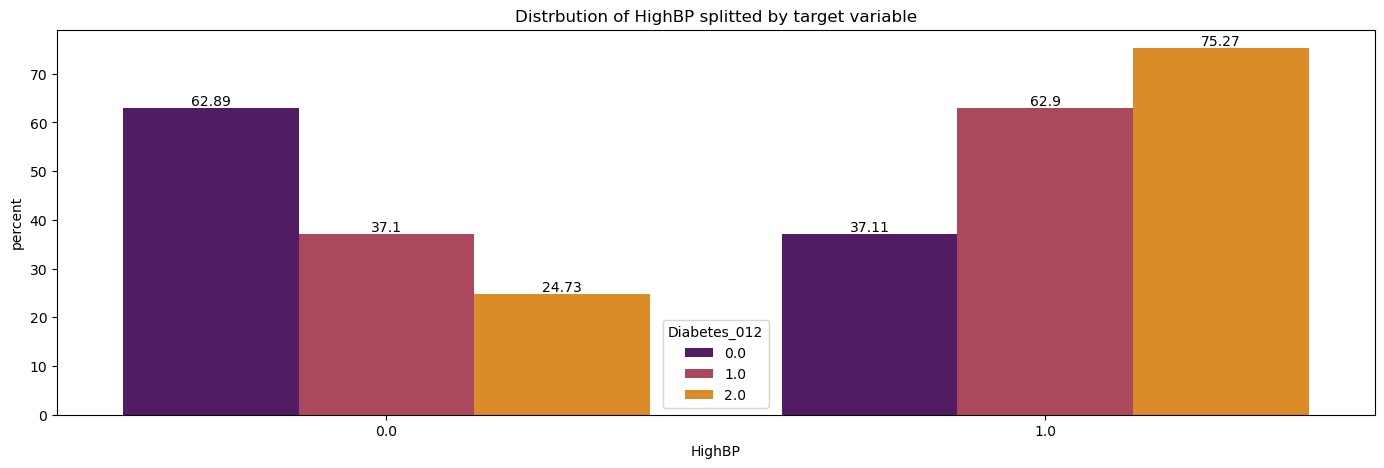

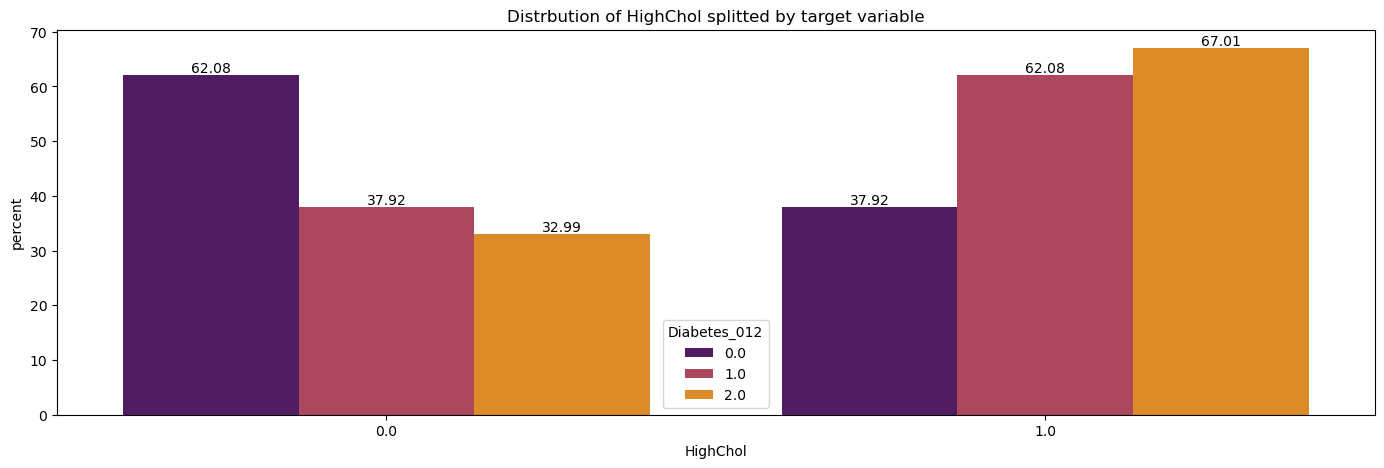

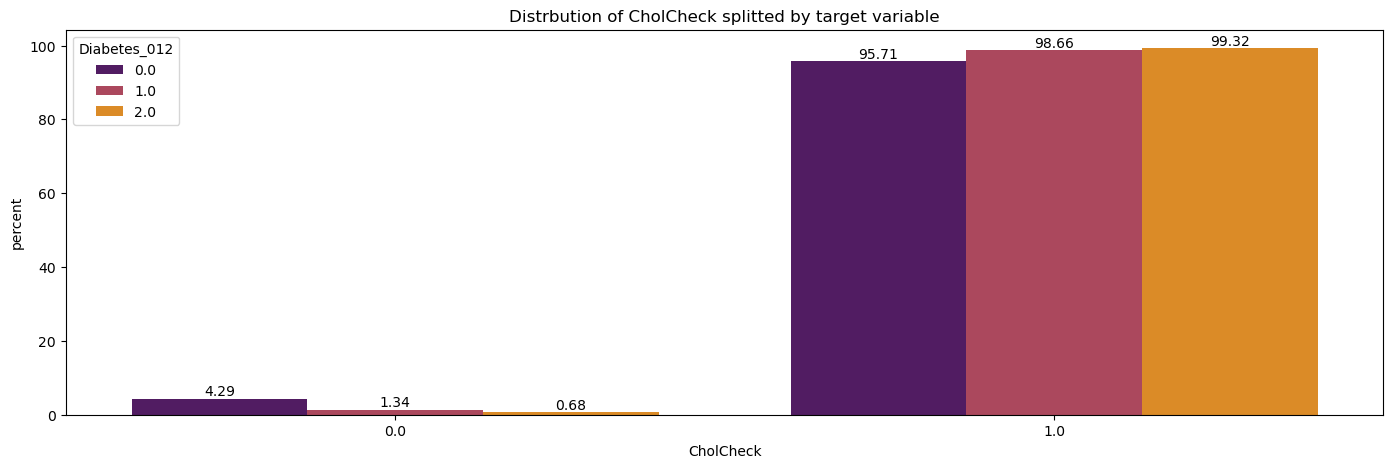

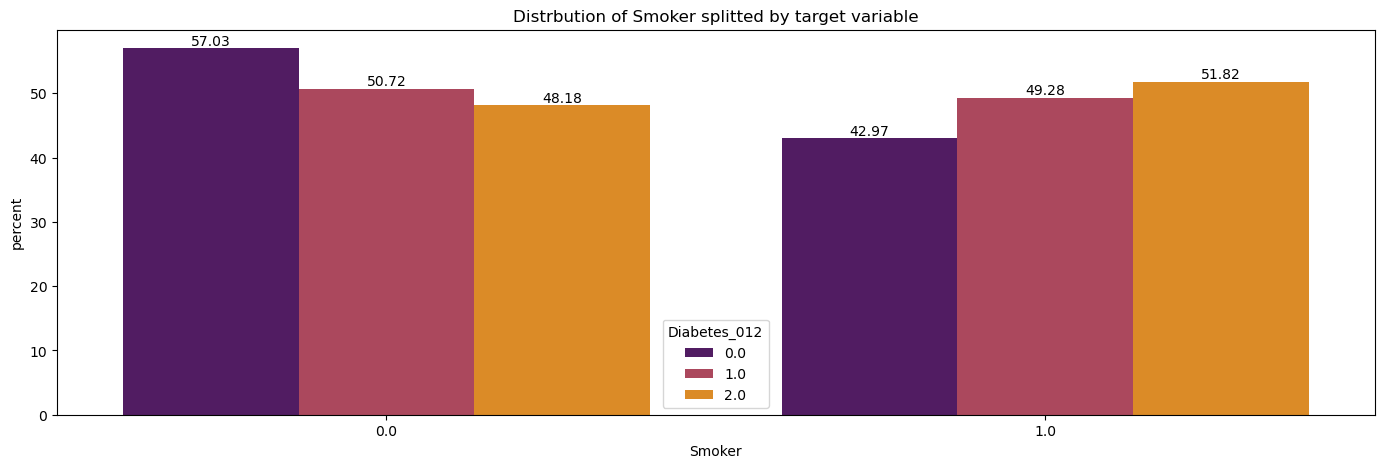

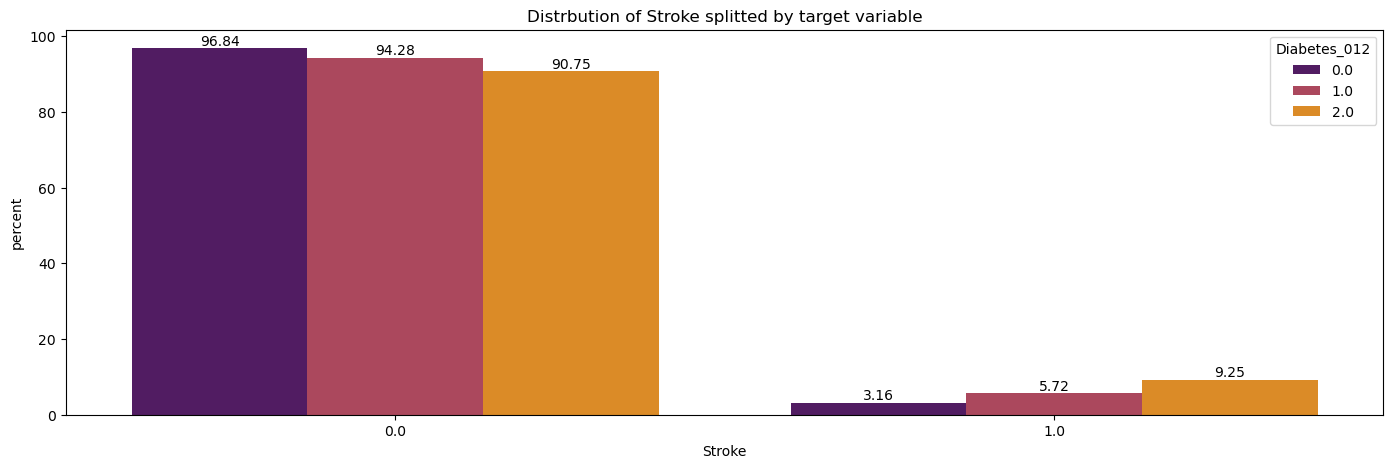

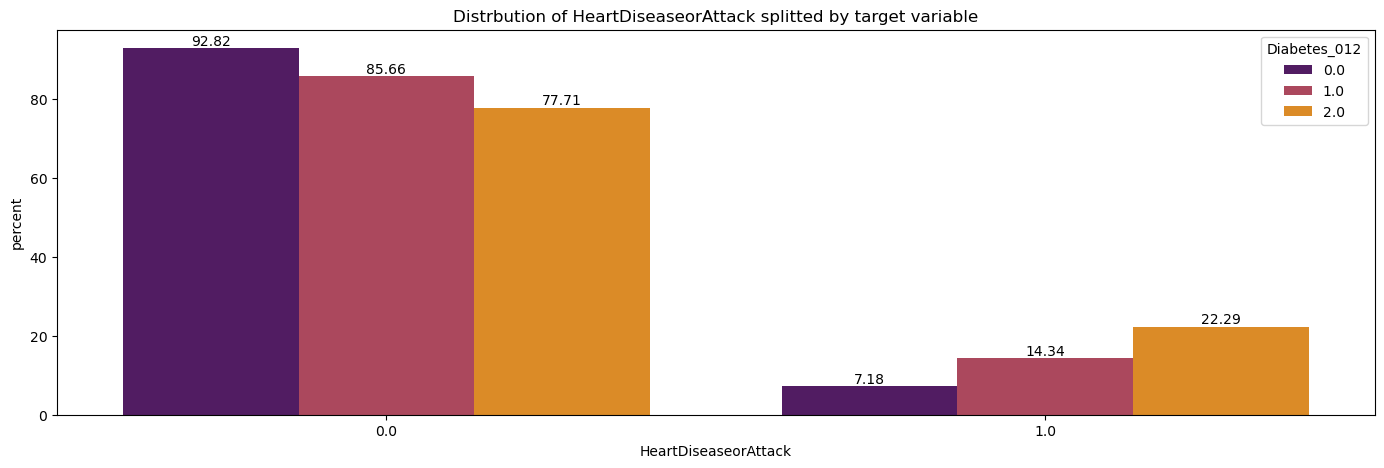

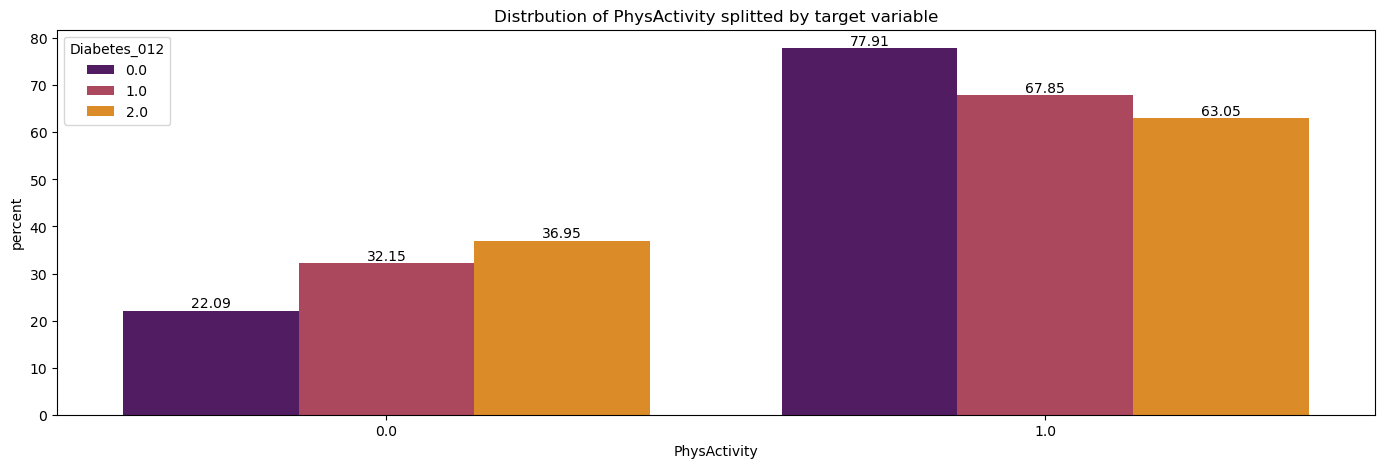

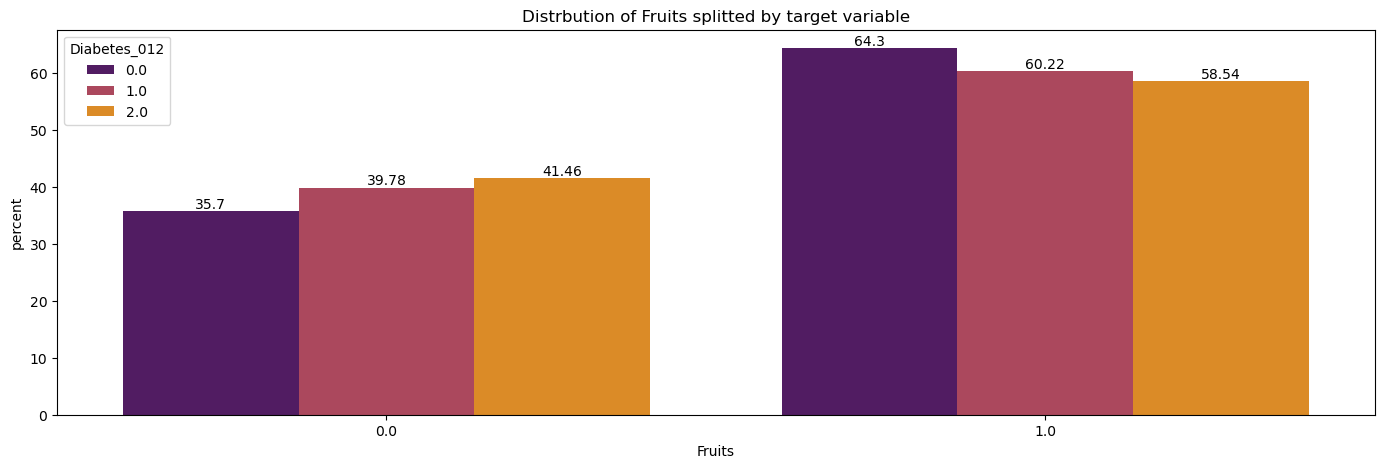

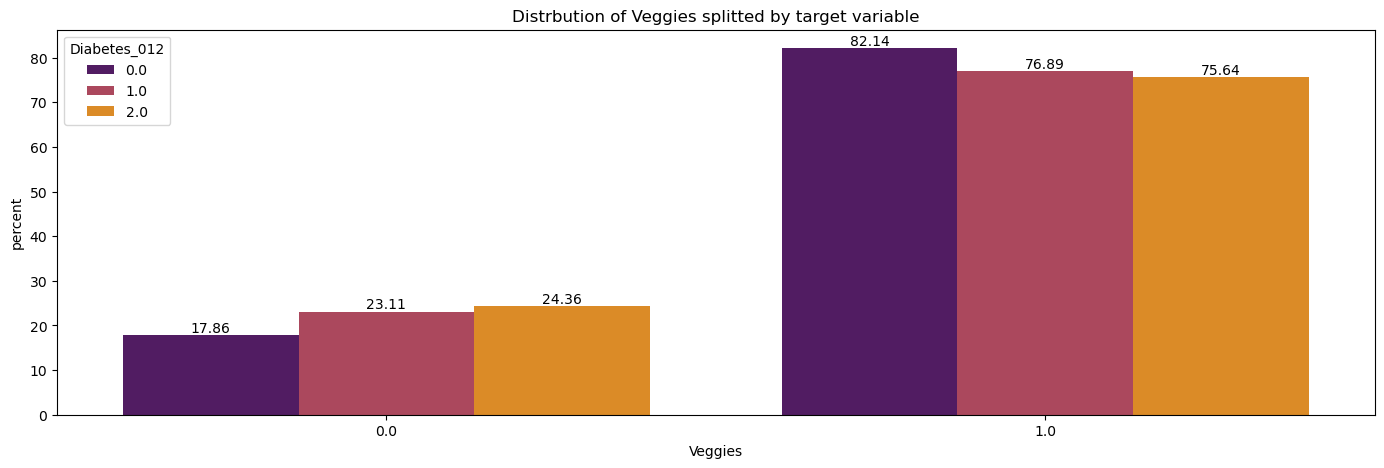

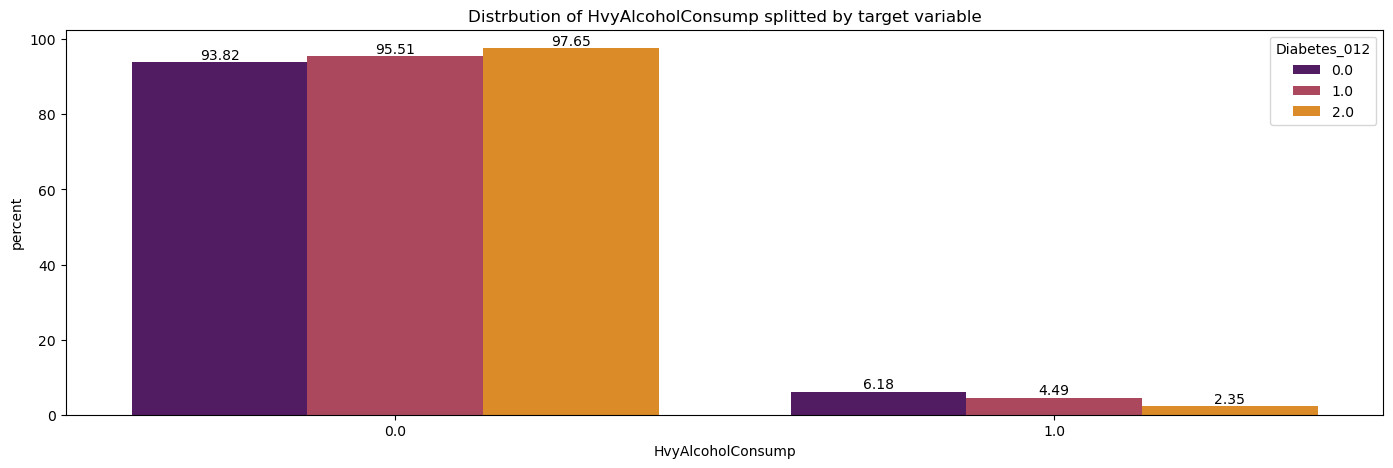

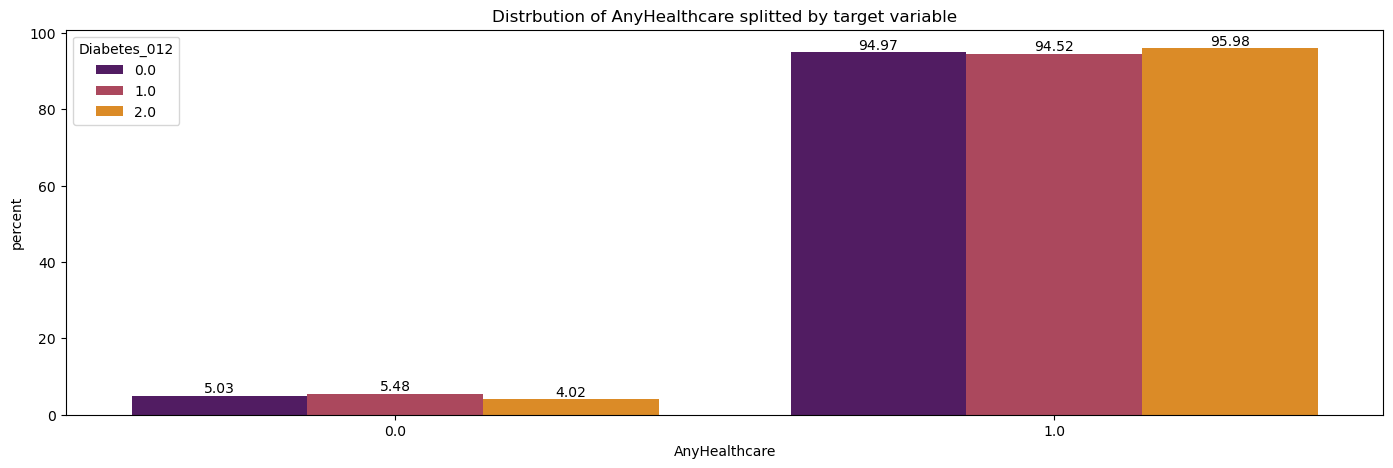

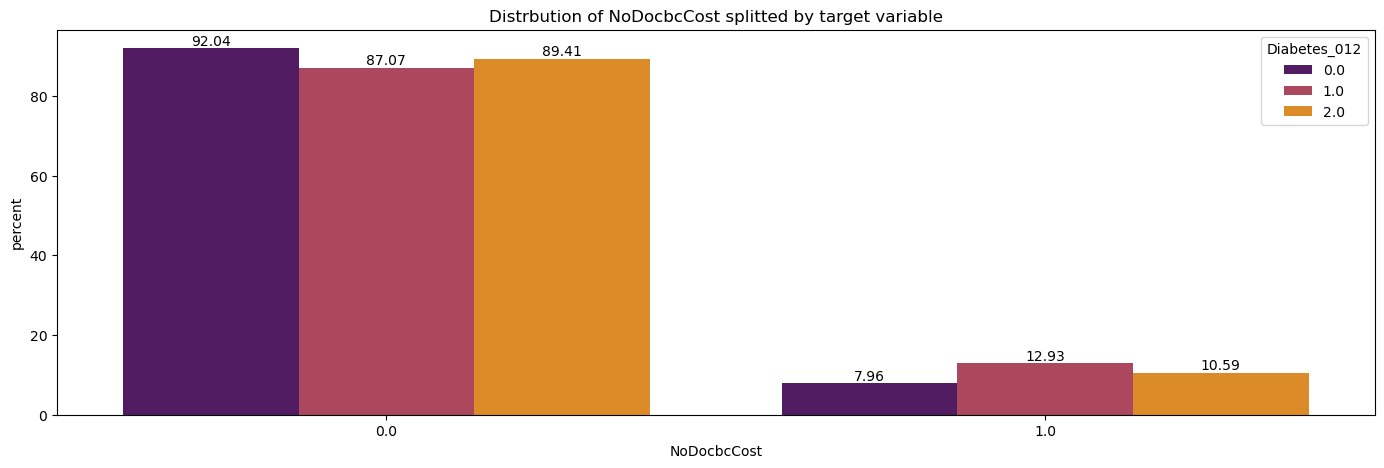

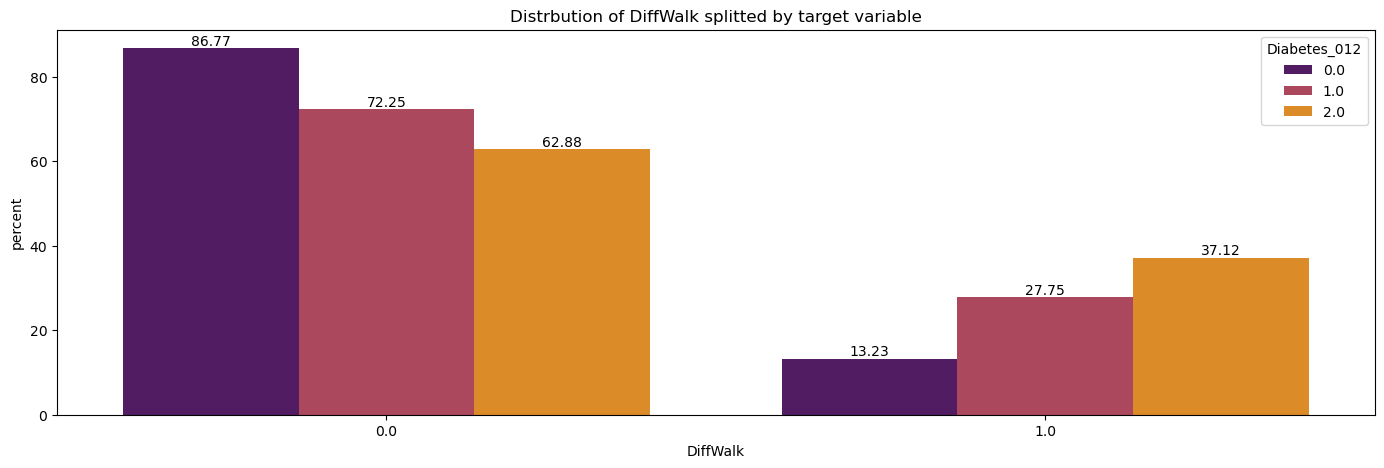

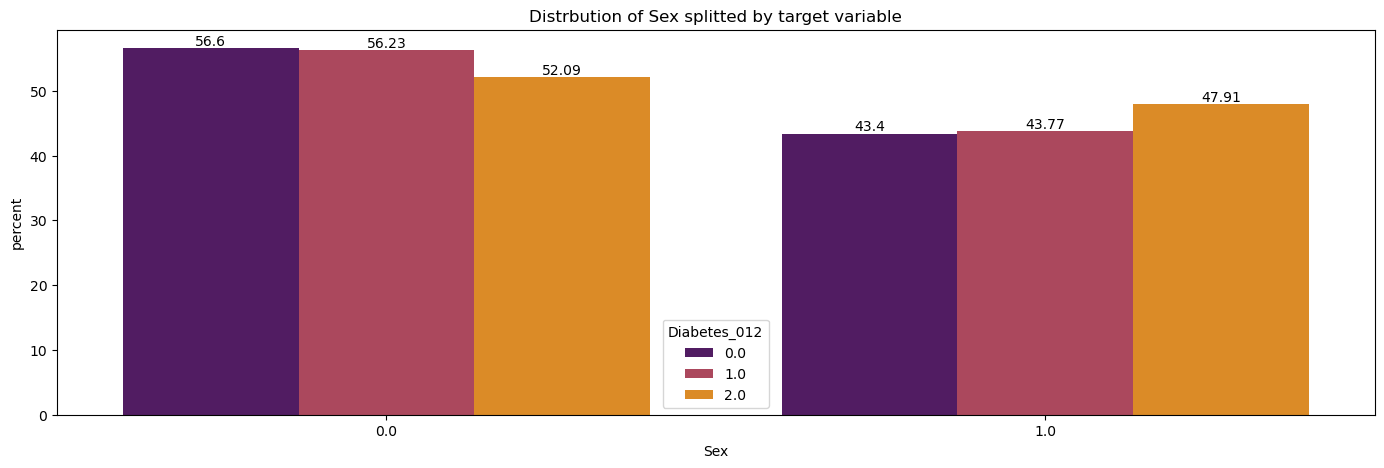

In [14]:
for col in bi_cols:
    plt.figure(figsize=(17, 5))
    
    a = df_bool.groupby(["Diabetes_012", col], as_index = False)["ind"].count()
    a["count"]= a["ind"]
    a = a.drop(["ind"],axis=1)
    
    c = a.merge(b, on="Diabetes_012", how="left")

    d = c.assign(percent = round(100*c["count"]/c["all_by_diab"], 2))

    ax = sns.barplot(x=d[col], y=d["percent"], data=d, palette='inferno', hue=d["Diabetes_012"])
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

Description: The bar charts above depict the proportions (in percentage) of each unique value of the target variable.

Conclusions:

* HighBP - Over 60% of individuals without diabetes do not have high blood pressure.
* Over 75% of individuals with diabetes have high blood pressure.
* HighChol - Over 60% of individuals without diabetes do not have high cholesterol.
* Difficulties with walking occur more frequently in individuals with diabetes.
* Myocardial ischemia and coronary heart disease occur more frequently in individuals with diabetes.
* Individuals without physical activity are more likely to have diabetes.

#### Analysis of Numerical Columns

In [15]:
df_num["BMI_10"] = 10*(df_num["BMI"]//10)
df_num["MentHlth_10"] = 10*(df_num["MentHlth"]//10)
df_num["PhysHlth_10"] = 10*(df_num["PhysHlth"]//10)

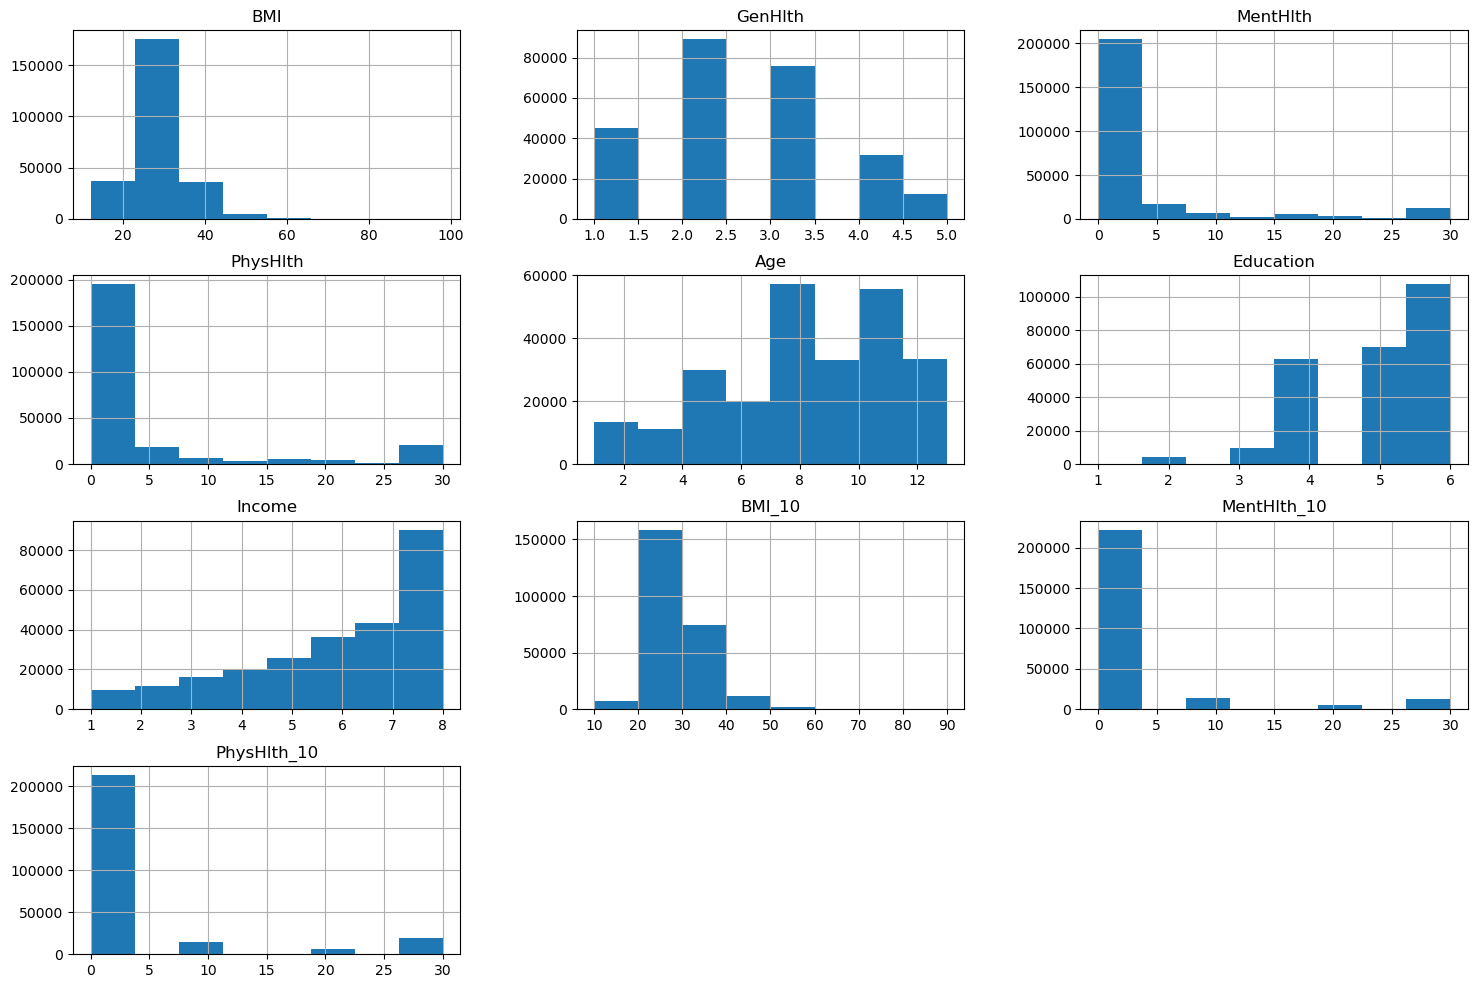

In [16]:
df_num1 = df_num.drop(['Diabetes_012'], axis=1).reset_index(drop = True)
df_num1.hist(bins = 8, figsize=(18, 12))
plt.show()

In [17]:
df_num["ind"] = range(0,len(df_num["Education"]))
cat_cols = ["GenHlth", "Age", "Education", "Income", "BMI_10", "PhysHlth_10", "MentHlth_10"]
b = df_num.groupby(["Diabetes_012"], as_index = False)["ind"].count()
b["all_by_diab"]= b["ind"]
b = b.drop(["ind"],axis=1)

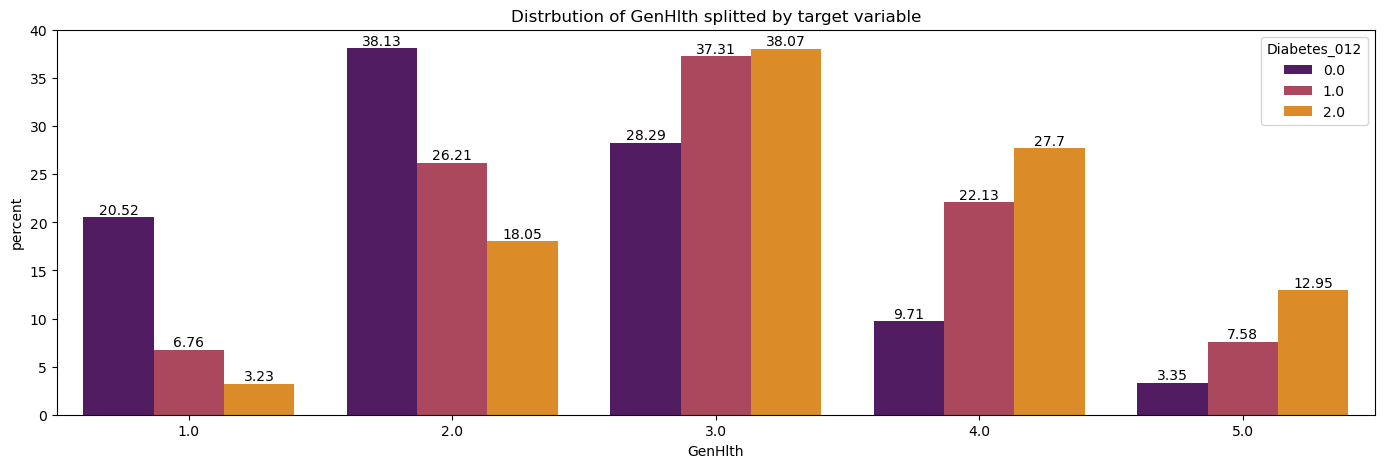

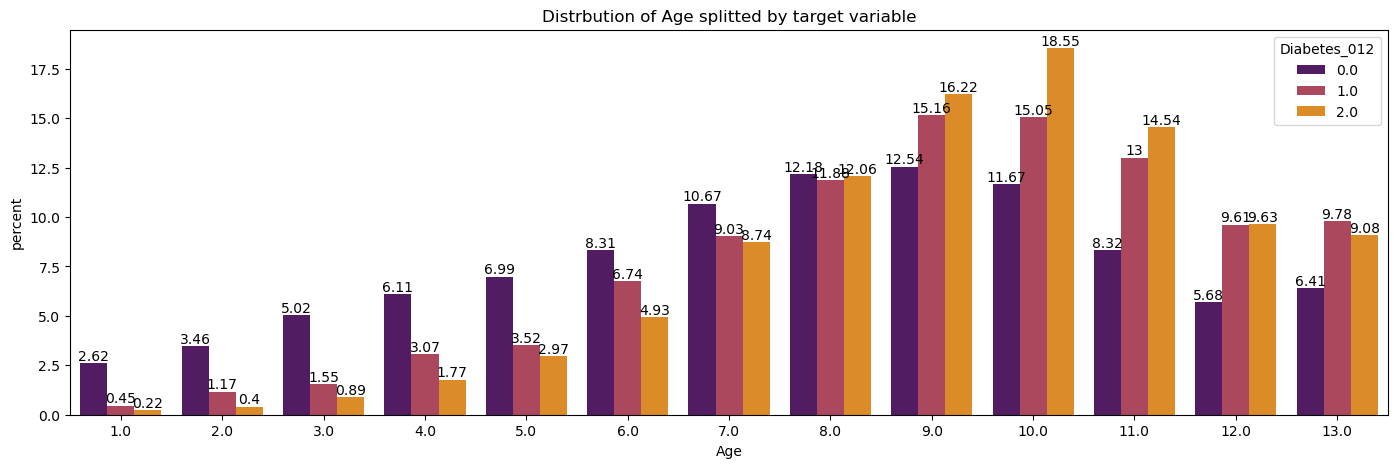

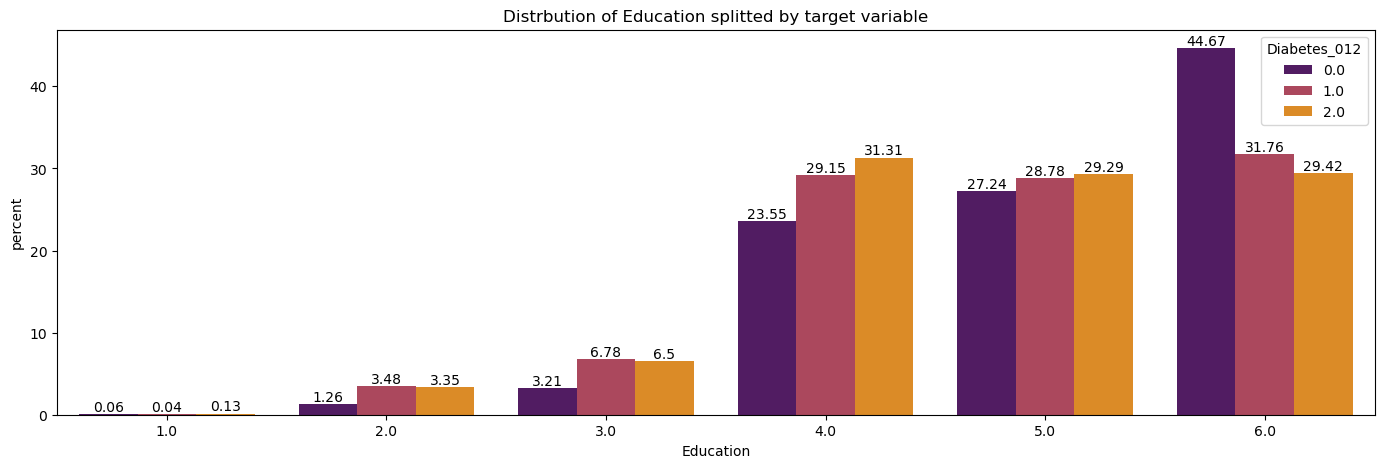

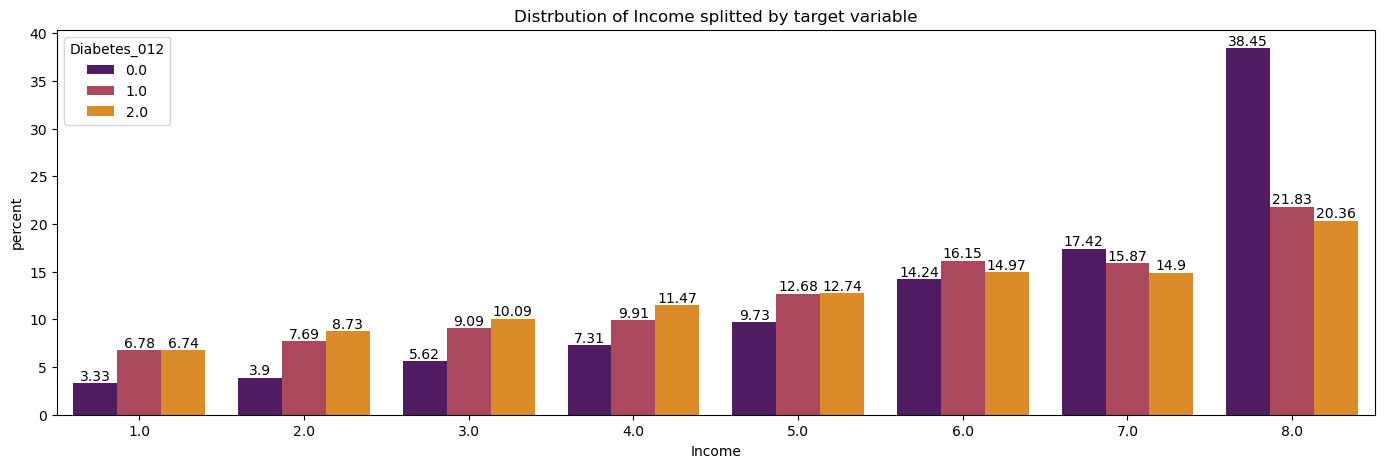

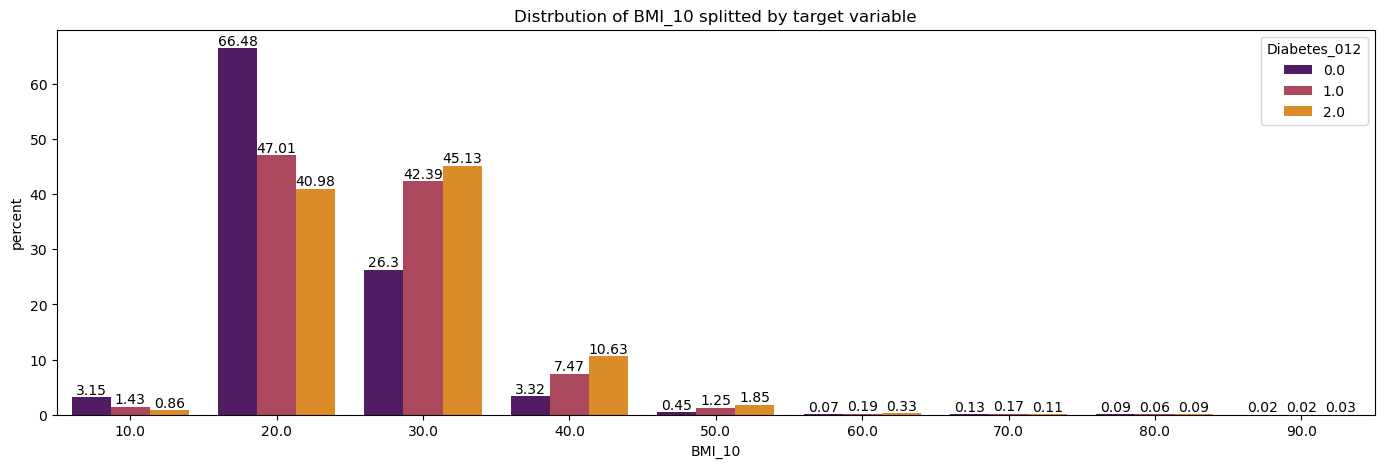

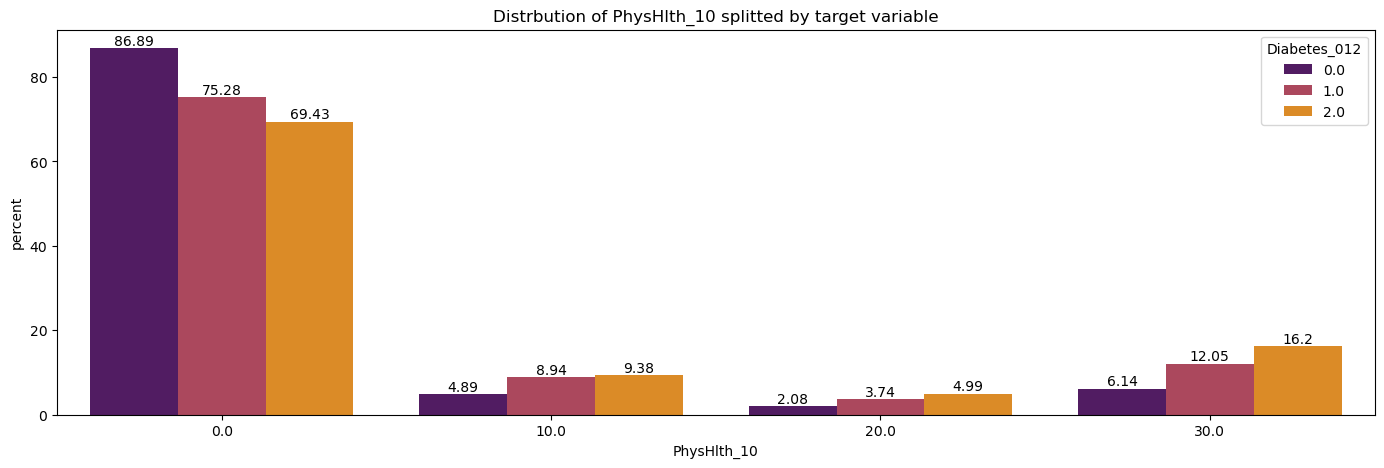

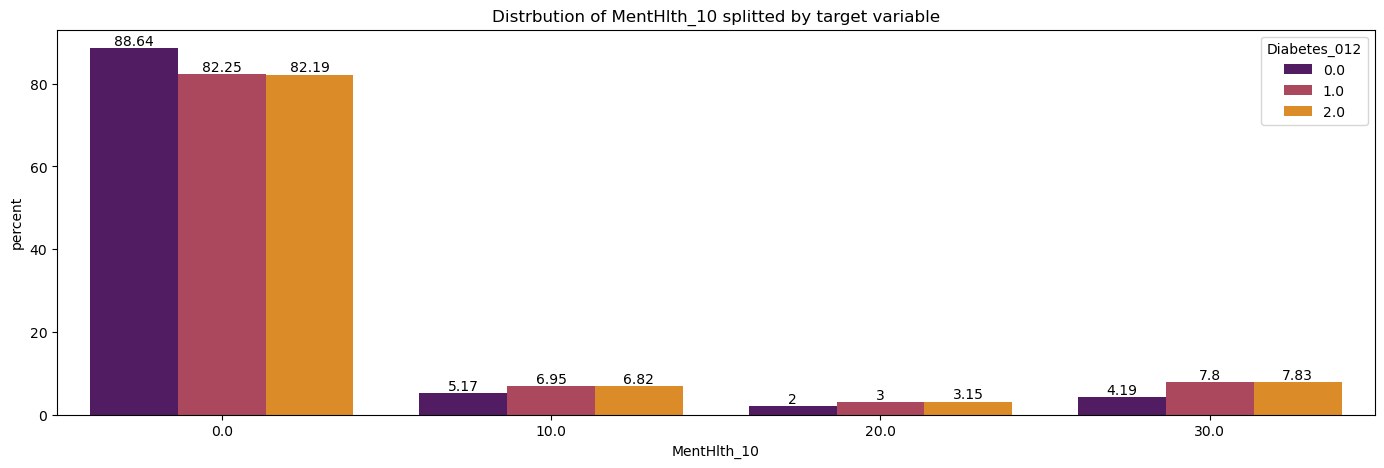

In [18]:
for col in cat_cols:
    plt.figure(figsize=(17, 5))
    
    a = df_num.groupby(["Diabetes_012", col], as_index = False)["ind"].count()
    a["count"]= a["ind"]
    a = a.drop(["ind"],axis=1)
    
    c = a.merge(b, on="Diabetes_012", how="left")
    d = c.assign(percent = round(100*c["count"]/c["all_by_diab"], 2))

    ax = sns.barplot(x=d[col], y=d["percent"], data=d, palette='inferno', hue=d["Diabetes_012"])
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

Description: The bar charts above depict the proportions (in percentage) of each unique value of the target variable.

Conclusions:
* Age - Approximately 55% of individuals without diabetes are below 59 years old, while over 65% of individuals with diabetes are over 59 years old.
* Education - About 45% of individuals without diabetes have higher education (Education = 6).
* Income - Around 40% of individuals without diabetes earn over 75,000.
* BMI_10 - About 65% of individuals without diabetes have a BMI index ranging from 20 to 30.
* GenHlth - Over 85% of individuals without diabetes rate their health as at least good, while over 40% of individuals with diabetes rate their health as average or poor.

In [19]:
num_cols = ['BMI', "MentHlth", "PhysHlth"]
b = df_num.groupby(["Diabetes_012"], as_index = False)["ind"].count()
b["all_by_diab"]= b["ind"]
b = b.drop(["ind"],axis=1)

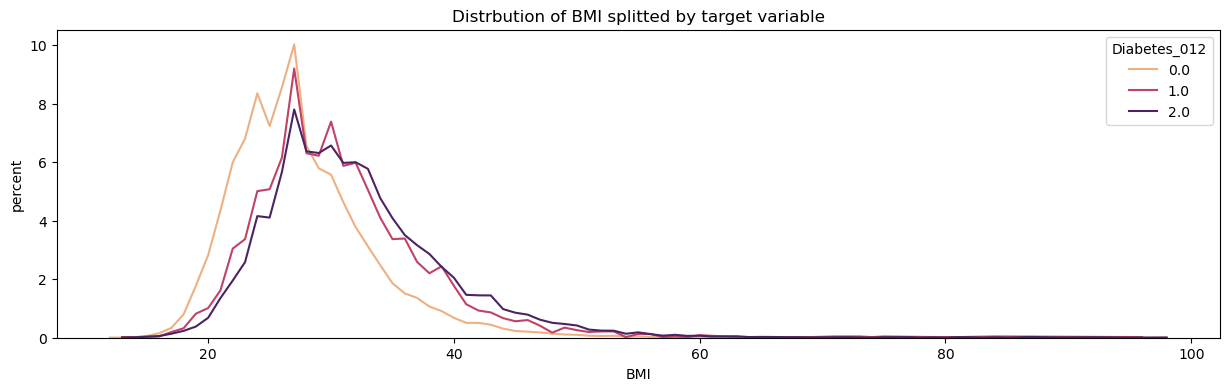

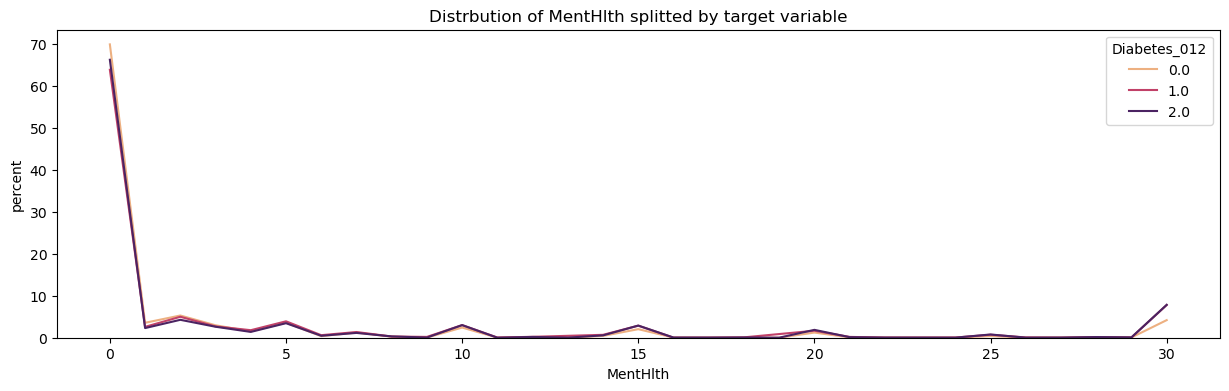

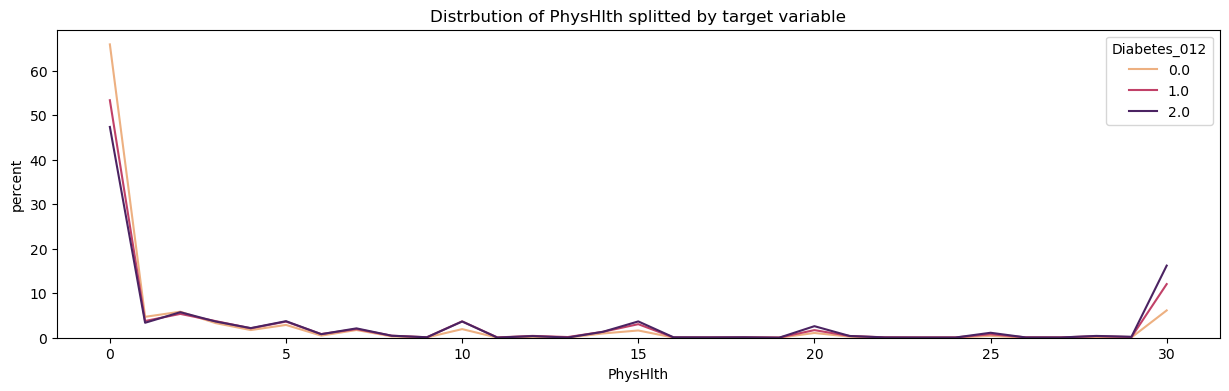

In [20]:
for col in num_cols:
    plt.figure(figsize=(15, 4))
    
    a = df_num.groupby(["Diabetes_012", col], as_index = False)["ind"].count()
    a["count"]= a["ind"]
    a = a.drop(["ind"],axis=1)
    
    c = a.merge(b, on="Diabetes_012", how="left")

    d = c.assign(percent = 100*c["count"]/c["all_by_diab"])

    ax = sns.lineplot(x=d[col], y=d["percent"], data=d, palette='flare', hue=d["Diabetes_012"])
    plt.ylim(0, None)

    
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

Conclusion: Individuals with diabetes have higher BMI.

### Train, Validation and Test Sets

In [21]:
X_dev, X_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Diabetes_012'])
X_train, X_val = train_test_split(X_dev, test_size=0.3, random_state=42, stratify=X_dev['Diabetes_012'])

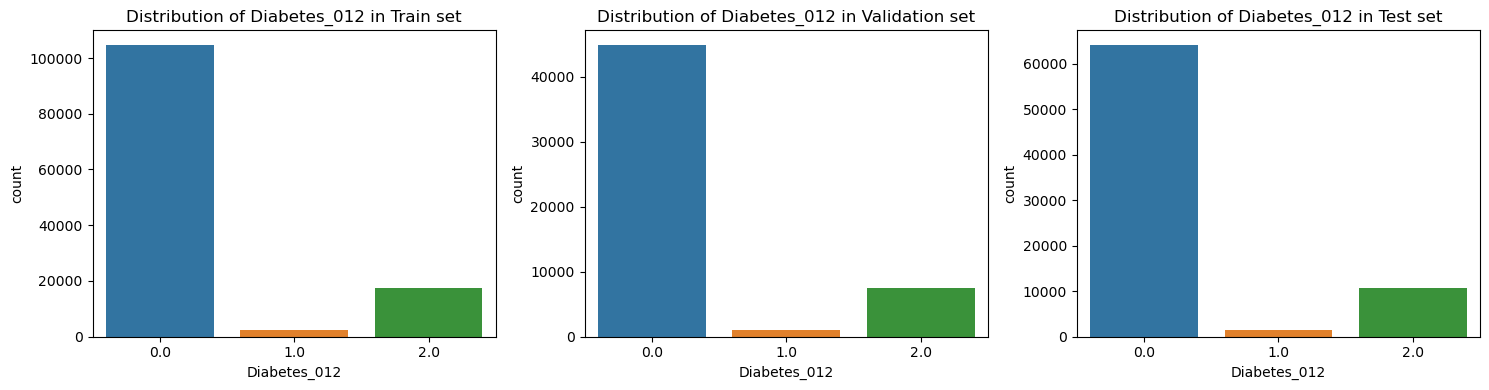

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot the distribution of the target column in each set
for i, dataset in enumerate([X_train, X_val, X_test]):
    sns.countplot(x='Diabetes_012', data=dataset, ax=axes[i])
    axes[i].set_title(f"Distribution of Diabetes_012 in {'Train' if i==0 else 'Validation' if i==1 else 'Test'} set")

plt.tight_layout()
plt.show()

In [23]:
print('Train: ', X_train.shape)
print('Val: ', X_val.shape)
print('Test: ', X_test.shape)

Train:  (124303, 22)
Val:  (53273, 22)
Test:  (76104, 22)


In [24]:
# X_train.to_csv('X_train.csv', index=False)
# X_val.to_csv('X_val.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)

### Preprocessing

##### Outliers

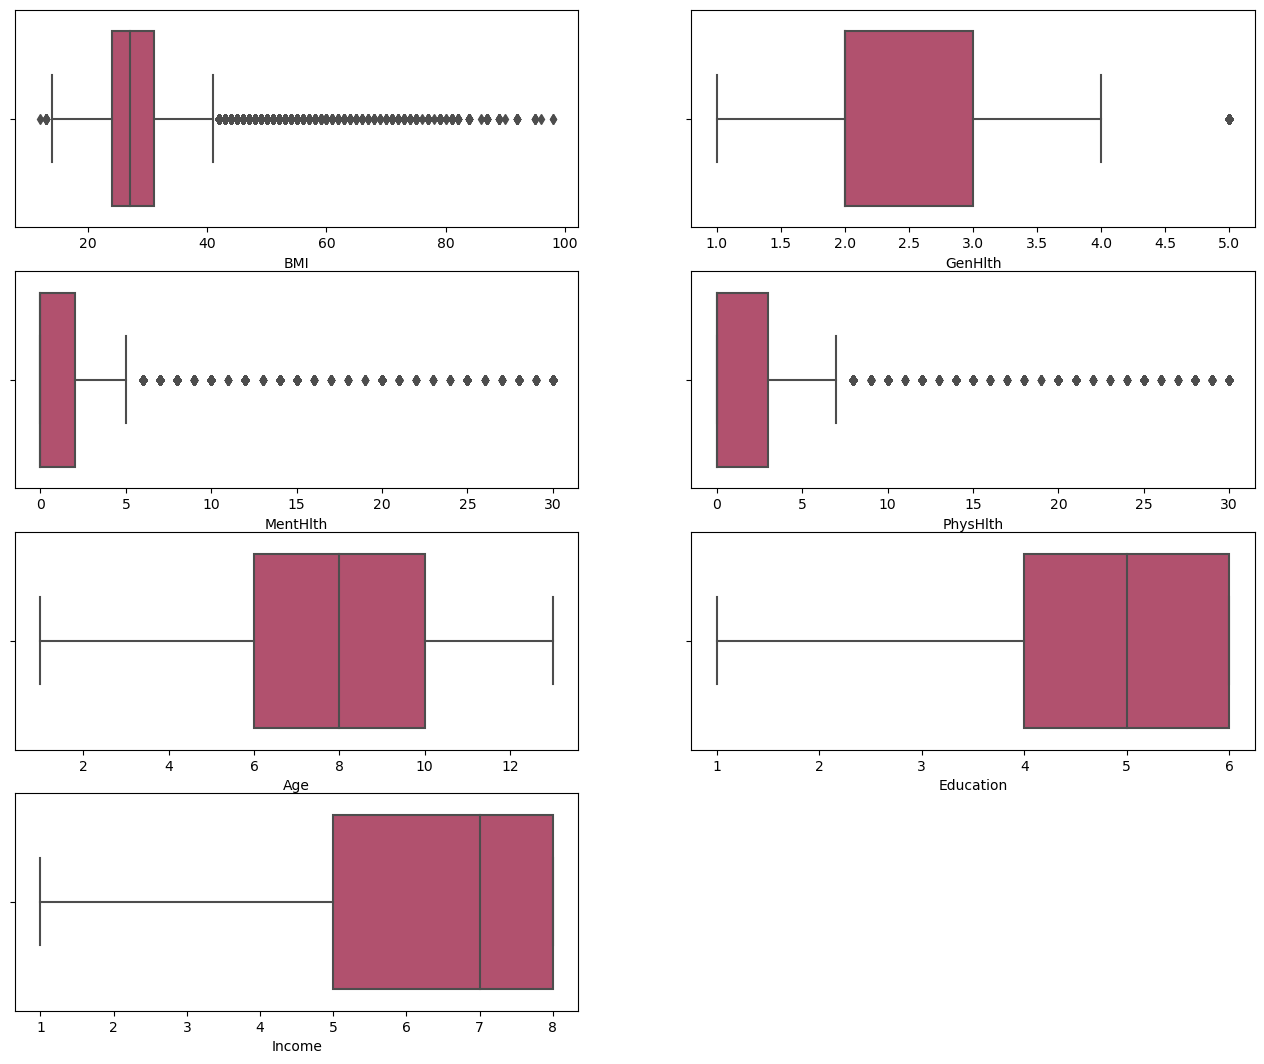

In [25]:
plt.figure(figsize = (16,13))

for i, col in enumerate(['BMI', "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = X_train, palette='flare')
plt.show()

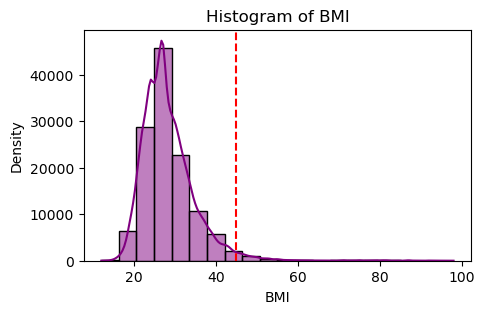

Value above which highest 2% of the data falls: 45.0


In [26]:
plt.figure(figsize=(5, 3))
sns.histplot(X_train['BMI'], bins=20, kde=True, color='purple', edgecolor='black')

highest_2_percent = X_train['BMI'].quantile(0.98)
plt.axvline(x=highest_2_percent, color='red', linestyle='--')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()
print("Value above which highest 2% of the data falls:", highest_2_percent)

In [27]:
X_train.loc[X_train['BMI'] > highest_2_percent, 'BMI'] = highest_2_percent

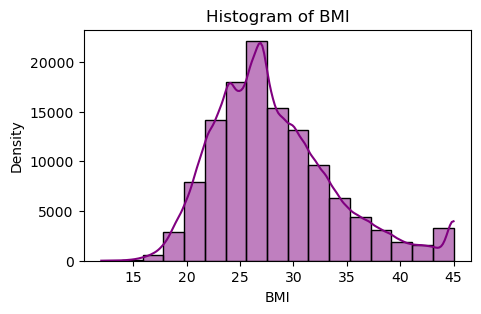

In [28]:
plt.figure(figsize=(5, 3))
sns.histplot(X_train['BMI'], bins=17, kde=True, color='purple', edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

Checking for outliers in GenHlth

In [29]:
X_train['GenHlth'].value_counts()

GenHlth
2.0    43721
3.0    37120
1.0    22173
4.0    15365
5.0     5924
Name: count, dtype: int64

#### VIF Test

The Variance Inflation Factor (VIF) measures the severity of multicollinearity in regression analysis. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.

In [30]:
X = X_train
X.drop_duplicates(inplace = True)
X['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Variable         VIF
0           Diabetes_012    1.206303
1                 HighBP    1.331727
2               HighChol    1.167447
3              CholCheck    1.036647
4                    BMI    1.176922
5                 Smoker    1.081976
6                 Stroke    1.079078
7   HeartDiseaseorAttack    1.169616
8           PhysActivity    1.142256
9                 Fruits    1.100636
10               Veggies    1.101858
11     HvyAlcoholConsump    1.027595
12         AnyHealthcare    1.111455
13           NoDocbcCost    1.137317
14               GenHlth    1.768586
15              MentHlth    1.227732
16              PhysHlth    1.601997
17              DiffWalk    1.519834
18                   Sex    1.078433
19                   Age    1.358386
20             Education    1.285086
21                Income    1.448826
22             Intercept  116.413277


Conclusion:
A VIF value below 2 for all variables indicates a favorable absence of strong multicollinearity in the regression analysis, suggesting stable and reliable coefficient estimates.

### Multinomial Logistic Regression without feature engineering and feature selection

Training set score: 0.8380
Test set score: 0.8462
Accuracy: 84.62%


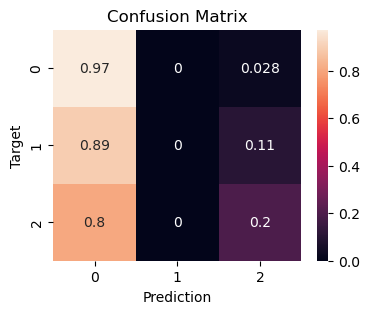

In [31]:
y_train_lg = np.array(X_train['Diabetes_012'])
X_train_lg = X_train.drop(['Diabetes_012', 'Intercept'],axis=1)
y_val_lg = np.array(X_val['Diabetes_012'])
X_val_lg = X_val.drop(['Diabetes_012'],axis=1)

lg_softmax = LogisticRegression(max_iter=1500, multi_class='multinomial')
lg_softmax.fit(X_train_lg, y_train_lg)
y_pred_lg = lg_softmax.predict(X_val_lg)

print('Training set score: {:.4f}'.format(lg_softmax.score(X_train_lg, y_train_lg)))
print('Test set score: {:.4f}'.format(lg_softmax.score(X_val_lg, y_val_lg)))
accuracy = accuracy_score(y_val_lg, y_pred_lg)
print("Accuracy: {:.2f}%".format(accuracy*100))
    
cf = confusion_matrix(y_val_lg, y_pred_lg, normalize = 'true')
plt.figure(figsize=(4, 3))
sns.heatmap(cf, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree without feature engineering and feature selection

In [32]:
y_train_dt = np.array(X_train['Diabetes_012'])
X_train_dt = X_train.drop(['Diabetes_012', 'Intercept'],axis=1)
y_val_dt = np.array(X_val['Diabetes_012'])
X_val_dt = X_val.drop(['Diabetes_012'],axis=1)

dt_classifier = DecisionTreeClassifier(criterion='gini')
dt_classifier.fit(X_train_dt, y_train_dt)
y_pred_dt = dt_classifier.predict(X_val_dt)

print('Training set score: {:.4f}'.format(dt_classifier.score(X_train_dt, y_train_dt)))
print('Test set score: {:.4f}'.format(dt_classifier.score(X_val_dt, y_val_dt)))
accuracy = accuracy_score(y_val_dt, y_pred_dt)
print("Accuracy: {:.2f}%".format(accuracy*100))

Training set score: 0.9948
Test set score: 0.7647
Accuracy: 76.47%


In [33]:
def calculate_gini(y_true, y_pred):
    sorted_indices = np.argsort(y_pred)[::-1]
    y_true_sorted = y_true[sorted_indices]
    cumsum_true = np.cumsum(y_true_sorted)
    cumsum_total = np.arange(1, len(y_true_sorted) + 1)
    gini_error = 1 - (2 * (cumsum_true / cumsum_total)).sum() / len(y_true_sorted)
    return gini_error
gini_error = calculate_gini(y_val_dt, y_pred_dt)
print(f"Gini error: {gini_error:.4f}")

Gini error: 0.1806


In [34]:
gini_impurities = dt_classifier.feature_importances_
best_feature_index = np.argmax(gini_impurities)

print(f"Best Feature: {X_train_dt.columns[best_feature_index]}")

Best Feature: BMI


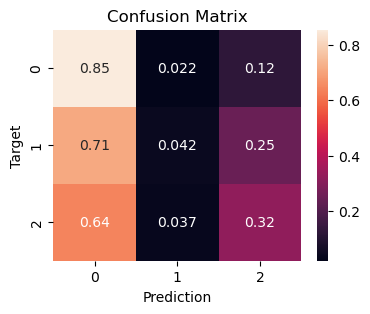

In [35]:
cf = confusion_matrix(y_val_dt, y_pred_dt, normalize='true')
plt.figure(figsize=(4, 3))
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

## Feature engineering

#### BMI discretization

According to The Centers for Disease Control and Prevention (CDC) we can use BMI to define a person as underweight, healthy weight, overweight, or obese. The BMI number and classifications:
* Underweight - BMI under 18.5 kg/m^2
* Healthy weight - BMI greater than or equal to 18.5 to 24.9 kg/m^2
* Overweight – BMI greater than or equal to 25 to 29.9 kg/m^2
* Obesity – BMI greater than or equal to 30 kg/m^2

In [36]:
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity']
X_train['binned_BMI'] = pd.cut(X_train['BMI'], bins=bins, labels=labels)

In [37]:
X_train['binned_BMI'].value_counts()

binned_BMI
Obesity           42328
Overweight        42092
Healthy weight    30253
Underweight        1496
Name: count, dtype: int64

In [38]:
X_train['binned_BMI'] = X_train['binned_BMI'].cat.codes

In [39]:
print('Pearson correlation coefficient: %1.4f' % X_train['binned_BMI'].corr(X_train['Diabetes_012'], method = "pearson"))
print('Spearman correlation coefficient: %1.4f' % X_train['binned_BMI'].corr(X_train['Diabetes_012'], method = "spearman"))

Pearson correlation coefficient: 0.2070
Spearman correlation coefficient: 0.2111


#### Create an overall health status

In [40]:
weights = {'GenHlth': 0.7, 'MentHlth': 0.01, 'PhysHlth': 0.01}
weighted_scores = X_train[['GenHlth', 'MentHlth', 'PhysHlth']] * pd.Series(weights)
X_train['OverallHealthStatus'] = weighted_scores.sum(axis=1)

print('Pearson correlation coefficient: %1.4f' % X_train['OverallHealthStatus'].corr(X_train['Diabetes_012'], method = "pearson"))
print('Spearman correlation coefficient: %1.4f' % X_train['OverallHealthStatus'].corr(X_train['Diabetes_012'], method = "spearman"))

Pearson correlation coefficient: 0.2876
Spearman correlation coefficient: 0.2709


#### Combine information from medical risk factors ('HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack') to create an overall health risk score.

In [41]:
weights = {'HighBP': 1.3, 'HighChol': 1, 'Stroke': 0.8, 'HeartDiseaseorAttack': 1.3} #Coefficients selected through trial and error method
weighted_scores = X_train[['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']] * pd.Series(weights)

X_train['OverallHealthRisk'] = weighted_scores.sum(axis=1)

print('Pearson correlation coefficient: %1.4f' % X_train['OverallHealthRisk'].corr(X_train['Diabetes_012'], method = "pearson"))
print('Spearman correlation coefficient: %1.4f' % X_train['OverallHealthRisk'].corr(X_train['Diabetes_012'], method = "spearman"))

Pearson correlation coefficient: 0.3196
Spearman correlation coefficient: 0.3135


#### Combine information from risk factors ('BMI', 'Age', 'PhysActivity') to create an overall health risk score.
These factors have been identified by The Centers for Disease Control and Prevention (CDC) as the main risk factors for diabetes.

In [42]:
X_train['OverallHealthRisk_CDC'] = X_train[['BMI', 'Age', 'PhysActivity']].mean(axis=1)

print('Pearson correlation coefficient: %1.4f' % X_train['OverallHealthRisk_CDC'].corr(X_train['Diabetes_012'], method = "pearson"))
print('Spearman correlation coefficient: %1.4f' % X_train['OverallHealthRisk_CDC'].corr(X_train['Diabetes_012'], method = "spearman"))

Pearson correlation coefficient: 0.2944
Spearman correlation coefficient: 0.2919


#### Access to nutritious food

In [43]:
X_train['NutritiousFood'] = (X_train['Fruits'].astype(bool) & X_train['Veggies'].astype(bool)).astype(int)
print('Pearson correlation coefficient: %1.4f' % X_train['NutritiousFood'].corr(X_train['Diabetes_012'], method = "pearson"))
print('Spearman correlation coefficient: %1.4f' % X_train['NutritiousFood'].corr(X_train['Diabetes_012'], method = "spearman"))


Pearson correlation coefficient: -0.0493
Spearman correlation coefficient: -0.0494


#### Bad habits

In [44]:
X_train['BadHabits'] = (X_train['Smoker'].astype(bool) & X_train['HvyAlcoholConsump'].astype(bool)).astype(int)
print('Pearson correlation coefficient: %1.4f' % X_train['BadHabits'].corr(X_train['Diabetes_012'], method = "pearson"))
print('Spearman correlation coefficient: %1.4f' % X_train['BadHabits'].corr(X_train['Diabetes_012'], method = "spearman"))


Pearson correlation coefficient: -0.0432
Spearman correlation coefficient: -0.0426


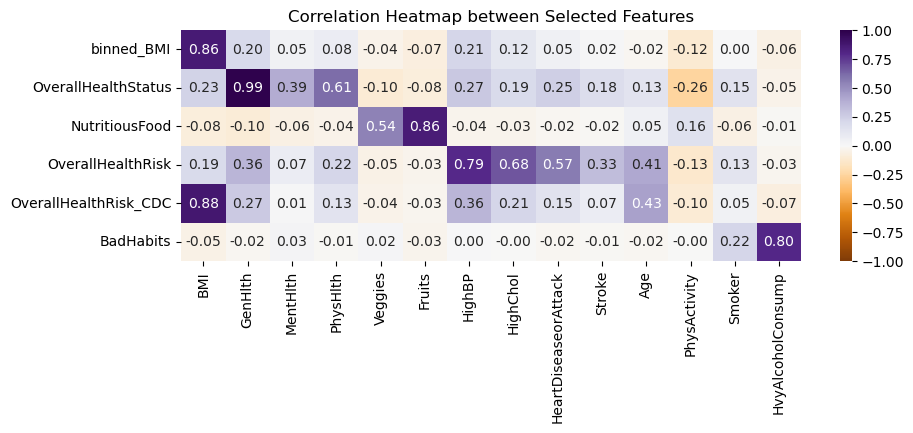

In [45]:
features_of_interest_x = ['BMI', 
                          'GenHlth', 'MentHlth', 'PhysHlth',
                          'Veggies','Fruits',
                          'HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke', 
                          'Age', 'PhysActivity',
                         'Smoker', 'HvyAlcoholConsump']
features_of_interest_y = ['binned_BMI', 'OverallHealthStatus', 'NutritiousFood',
                          'OverallHealthRisk','OverallHealthRisk_CDC','BadHabits'] 

correlation_matrix_subset = X_train[features_of_interest_x + features_of_interest_y].corr()

# Create heatmap
plt.figure(figsize=(10, 3))
heatmap = sns.heatmap(correlation_matrix_subset.loc[features_of_interest_y, features_of_interest_x], 
                      vmin=-1, vmax=1, cmap="PuOr", annot=True, fmt=".2f")
plt.title('Correlation Heatmap between Selected Features')
plt.show()

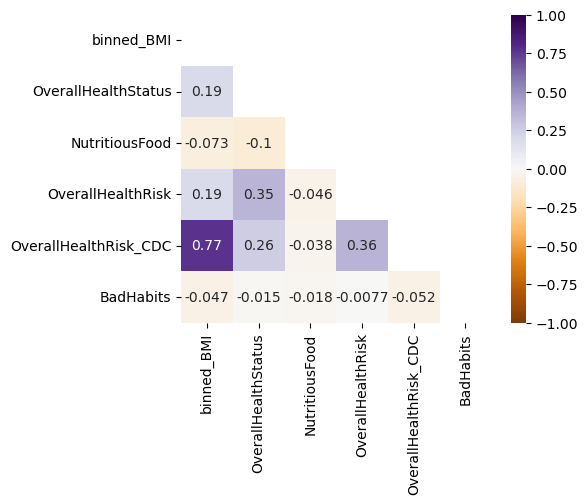

In [46]:
plt.figure(figsize=(5, 4))
mask = np.triu(X_train[['binned_BMI', 'OverallHealthStatus', 'NutritiousFood',
                          'OverallHealthRisk','OverallHealthRisk_CDC','BadHabits']].corr())
heatmap = sns.heatmap(X_train[['binned_BMI', 'OverallHealthStatus', 'NutritiousFood',
                          'OverallHealthRisk','OverallHealthRisk_CDC','BadHabits']].corr(), 
                      annot=True, vmin=-1, vmax=1, cmap="PuOr", mask=mask)
plt.show()

During the creation of new variables, several strong dependencies emerged. Therefore, in the next part, we will select only one feature (indicated as superior) from each group:
* BMI, binned_BMI
* OverallHealthStatus, GenHlth
* NutritiousFood, Fruits
* HighBP, OverallHealthRisk
* OverallHealthRisk_CDC, BMI
* BadHabits, HvyAlcoholConsump

In [47]:
X_val = pd.read_csv('X_val.csv')
X_train = pd.read_csv('X_train.csv')

In [48]:
def bin_BMI(data):
    bins = [0, 18.5, 24.9, 29.9, float('inf')]
    labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity']
    data['binned_BMI'] = pd.cut(data['BMI'], bins=bins, labels=labels)
    data['binned_BMI'] = data['binned_BMI'].cat.codes
    return data

def calculate_OverallHealthStatus(data):
    weights = {'GenHlth': 0.7, 'MentHlth': 0.01, 'PhysHlth': 0.01}
    weighted_scores = data[['GenHlth', 'MentHlth', 'PhysHlth']] * pd.Series(weights)
    data['OverallHealthStatus'] = weighted_scores.sum(axis=1)
    return data

def calculate_OverallHealthRisk(data):
    weights = {'HighBP': 1.3, 'HighChol': 1, 'Stroke': 0.8, 'HeartDiseaseorAttack': 1.3}
    weighted_scores = data[['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']] * pd.Series(weights)
    data['OverallHealthRisk'] = weighted_scores.sum(axis=1)
    return data

def calculate_OverallHealthRisk_CDC(data):
    data['OverallHealthRisk_CDC'] = data[['BMI', 'Age', 'PhysActivity']].mean(axis=1)
    return data

def identify_NutritiousFood(data):
    data['NutritiousFood'] = (data['Fruits'].astype(bool) & data['Veggies'].astype(bool)).astype(int)
    return data

def identify_BadHabits(data):
    data['BadHabits'] = (data['Smoker'].astype(bool) & data['HvyAlcoholConsump'].astype(bool)).astype(int)
    return data

feature_engineering_pipeline = Pipeline([
    ('bin_BMI', FunctionTransformer(bin_BMI)),
    ('calculate_OverallHealthStatus', FunctionTransformer(calculate_OverallHealthStatus)),
    ('calculate_OverallHealthRisk', FunctionTransformer(calculate_OverallHealthRisk)),
    ('calculate_OverallHealthRisk_CDC', FunctionTransformer(calculate_OverallHealthRisk_CDC)),
    ('identify_NutritiousFood', FunctionTransformer(identify_NutritiousFood)),
    ('identify_BadHabits', FunctionTransformer(identify_BadHabits))
])


In [49]:
X_train = feature_engineering_pipeline.fit_transform(X_train)

In [50]:
X_train.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Sex,Age,Education,Income,binned_BMI,OverallHealthStatus,OverallHealthRisk,OverallHealthRisk_CDC,NutritiousFood,BadHabits
0,0.0,0.0,1.0,0.0,22.0,1.0,0.0,0.0,0.0,0.0,...,1.0,13.0,6.0,8.0,1,0.70,1.0,11.666667,0,0
1,0.0,1.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,...,1.0,10.0,6.0,6.0,3,0.91,1.3,16.000000,0,0
2,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,6.0,8.0,1,2.13,0.0,9.666667,0,0
3,2.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,1.0,1.0,...,1.0,10.0,2.0,2.0,3,3.95,2.3,16.333333,1,0
4,0.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,10.0,6.0,7.0,2,0.70,1.3,12.000000,1,0


In [51]:
X_val = feature_engineering_pipeline.transform(X_val)

In [52]:
X_val.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Sex,Age,Education,Income,binned_BMI,OverallHealthStatus,OverallHealthRisk,OverallHealthRisk_CDC,NutritiousFood,BadHabits
0,2.0,1.0,1.0,1.0,34.0,1.0,0.0,0.0,1.0,1.0,...,1.0,7.0,4.0,8.0,3,2.81,2.3,14.000000,1,0
1,2.0,1.0,1.0,1.0,36.0,1.0,0.0,0.0,1.0,0.0,...,0.0,10.0,5.0,4.0,3,0.70,2.3,15.666667,0,0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,9.0,6.0,7.0,2,1.40,0.0,12.000000,1,0
3,0.0,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,0.0,12.0,5.0,4.0,3,2.10,1.0,14.666667,1,0
4,2.0,0.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,0.0,11.0,6.0,8.0,1,1.40,1.0,11.666667,1,0


In [53]:
y_train = np.array(X_train['Diabetes_012'])
X_train = X_train.drop(['Diabetes_012'],axis=1)
y_val = np.array(X_val['Diabetes_012'])
X_val = X_val.drop(['Diabetes_012'],axis=1)

In [54]:
# def create_new_features(data):
#     bins = [0, 18.5, 24.9, 29.9, float('inf')]
#     labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity']
#     data['binned_BMI'] = pd.cut(data['BMI'], bins=bins, labels=labels)
#     data['binned_BMI'] = data['binned_BMI'].cat.codes
    
#     weights = {'GenHlth': 0.7, 'MentHlth': 0.01, 'PhysHlth': 0.01}
#     weighted_scores = data[['GenHlth', 'MentHlth', 'PhysHlth']] * pd.Series(weights)
#     data['OverallHealthStatus'] = weighted_scores.sum(axis=1)
    
#     weights = {'HighBP': 1.3, 'HighChol': 1, 'Stroke': 0.8, 'HeartDiseaseorAttack': 1.3}
#     weighted_scores = data[['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']] * pd.Series(weights)
#     data['OverallHealthRisk'] = weighted_scores.sum(axis=1)
    
#     data['OverallHealthRisk_CDC'] = data[['BMI', 'Age', 'PhysActivity']].mean(axis=1)
    
#     data['NutritiousFood'] = (data['Fruits'].astype(bool) & data['Veggies'].astype(bool)).astype(int)
    
#     data['BadHabits'] = (data['Smoker'].astype(bool) & data['HvyAlcoholConsump'].astype(bool)).astype(int)
#     return data 

### Features selection for Multinomial Logistic Regression

In [55]:
BestFeatures = SelectKBest(score_func=f_classif, k=10)
fit = BestFeatures.fit(X_train, y_train)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

f_Scores = pd.concat([df_columns,df_scores],axis=1)
f_Scores.columns = ['Feature','Score']

print(f_Scores.nlargest(27,'Score').reset_index(drop=True))

                  Feature        Score
0       OverallHealthRisk  7466.500282
1                 GenHlth  6321.727355
2     OverallHealthStatus  6205.958881
3   OverallHealthRisk_CDC  5396.581733
4                  HighBP  5057.404911
5                     BMI  3335.276621
6                DiffWalk  3280.462458
7              binned_BMI  2997.770995
8                HighChol  2924.874887
9                     Age  2247.261366
10   HeartDiseaseorAttack  2084.789379
11               PhysHlth  2035.780318
12                 Income  1930.500719
13              Education  1124.548644
14           PhysActivity   948.935594
15                 Stroke   734.679001
16               MentHlth   350.406450
17              CholCheck   291.942632
18                 Smoker   265.797796
19         NutritiousFood   255.436335
20                Veggies   226.473776
21      HvyAlcoholConsump   184.247095
22                 Fruits   129.673170
23            NoDocbcCost   100.358358
24              BadHabits

Taking into account the above rankings and previously observed correlations, we decide to discard the following features: ['BMI', 'OverallHealthStatus','HighBP', 'Sex', 'NutritiousFood', 'Veggies', 'Fruits', 'NoDocbcCost', 'AnyHealthcare', 'BadHabits', 'Smoker']

In [56]:
X_train_lg = X_train.drop(['BMI', 'OverallHealthStatus','HighBP', 'Sex', 'NutritiousFood', 'Veggies', 
                           'Fruits', 'NoDocbcCost', 'AnyHealthcare', 'BadHabits', 'Smoker'],axis=1)
X_val_lg = X_val.drop(['BMI', 'OverallHealthStatus','HighBP', 'Sex', 'NutritiousFood', 'Veggies', 
                       'Fruits', 'NoDocbcCost', 'AnyHealthcare', 'BadHabits', 'Smoker'],axis=1)

### Multinomial Logistic Regression with feature engineering and feature selection

Training set score: 0.8469
Test set score: 0.8474
Accuracy: 84.74%


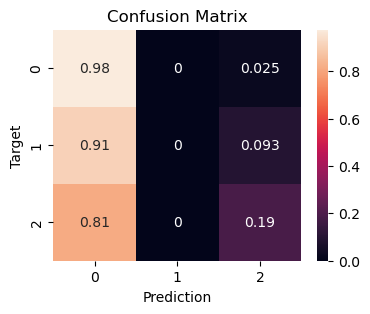

In [57]:
lg = LogisticRegression(max_iter = 1500, multi_class='multinomial')
lg.fit(X_train_lg , y_train)
y_pred=lg.predict(X_val_lg)

print('Training set score: {:.4f}'.format(lg.score(X_train_lg, y_train)))
print('Test set score: {:.4f}'.format(lg.score(X_val_lg, y_val)))
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
    
cf = confusion_matrix(y_val, y_pred, normalize = 'true')
plt.figure(figsize=(4, 3))
sns.heatmap(cf, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree with feature engineering

In [58]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_val)

print('Training set score: {:.4f}'.format(dt_classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt_classifier.score(X_val, y_val)))
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
gini_error = calculate_gini(y_val_dt, y_pred_dt)
print(f"Gini error: {gini_error:.4f}")

Training set score: 0.9951
Test set score: 0.7650
Accuracy: 76.50%
Gini error: 0.1806


In [59]:
gini_impurities = dt_classifier.feature_importances_
best_feature_index = np.argmax(gini_impurities)

print(f"Best Feature: {X_train.columns[best_feature_index]}")

Best Feature: OverallHealthRisk


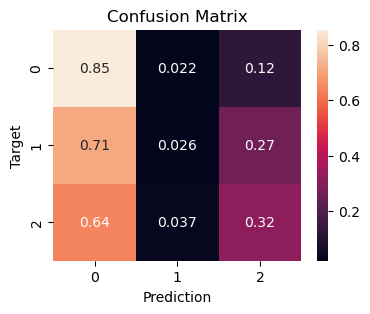

In [60]:
cf = confusion_matrix(y_val, y_pred, normalize='true')
plt.figure(figsize=(4, 3))
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()